In [30]:
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [77]:
class Bandit:
    def __init__(self, mu: float, std: float):
        self._mu = mu
        self._std = std
        self._Q = 0
        self._N = 0

    def pull(self) -> float:
        return np.random.normal(loc=self._mu, scale=self._std)

    def update(self, r: float):
        self._N += 1
        alpha = 1 / self._N
        self._Q += (r - self._Q) * alpha

    def reset(self):
        self._Q = 0
        self._N = 0
        
    @property
    def true_mean(self) -> float:
        return self._mu

    @property
    def Q(self) -> float:
        return self._Q

In [78]:
MEANS = np.random.randn(10)
VARs = np.random.rand(10)
bandits = [Bandit(mu, std) for mu, std in zip(MEANS, VARs)]
optimal_bandit = np.argmax([b.true_mean for b in bandits])
print(optimal_bandit)

4


In [81]:
def single_run(n_steps: int, bandits: List[Bandit], eps: float) -> Tuple[np.ndarray, np.ndarray]:
    n_expr = 0
    n_expl = 0

    rewards = np.zeros(n_steps)
    optimal_pull = np.zeros(n_steps)
    best_bandit = np.argmax([b.true_mean for b in bandits])
    
    for i in range(n_steps):
        if np.random.rand() < eps:
            bandit = np.random.randint(0, len(bandits))
            n_expr += 1
        else:
            bandit = np.argmax([b.Q for b in bandits])
            n_expl += 1


        reward = bandits[bandit].pull()
        bandits[bandit].update(reward)
        rewards[i] = reward
        optimal_pull[i] = 1 if bandit == best_bandit else 0

    return rewards, optimal_pull

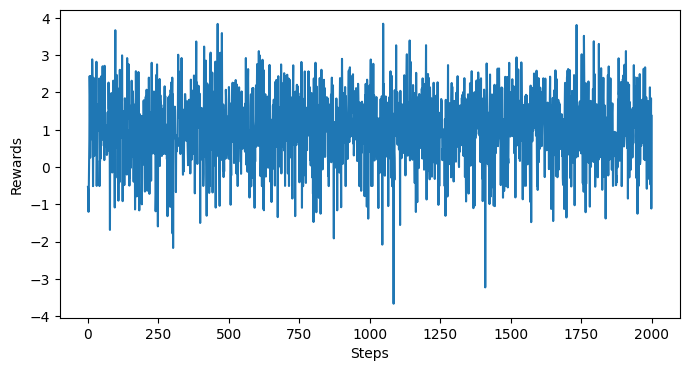

In [82]:
single_run_rewards, single_run_optimal_pull = single_run(2000, bandits, 0.1)
[b.reset() for b in bandits]
plt.figure(figsize=(8,4))
plt.plot(single_run_rewards)
plt.xlabel("Steps")
plt.ylabel("Rewards")
plt.show()

In [83]:
def simulate_experiment(n_runs: int, n_steps: int, bandits: List[Bandit], eps: float) -> Tuple[np.ndarray, np.ndarray]:
    rewards = np.zeros((n_runs, n_steps))
    optimal_pulls = np.zeros((n_runs, n_steps))

    for run in range(n_runs):
        reward, optimal_pull = single_run(n_steps, bandits, eps)
        rewards[run] = reward
        optimal_pulls[run] = optimal_pull
        [b.reset() for b in bandits]

    return np.mean(rewards, axis=0), np.mean(optimal_pulls, axis=0)
        

EPS = 0.0
EPS = 0.01
EPS = 0.1


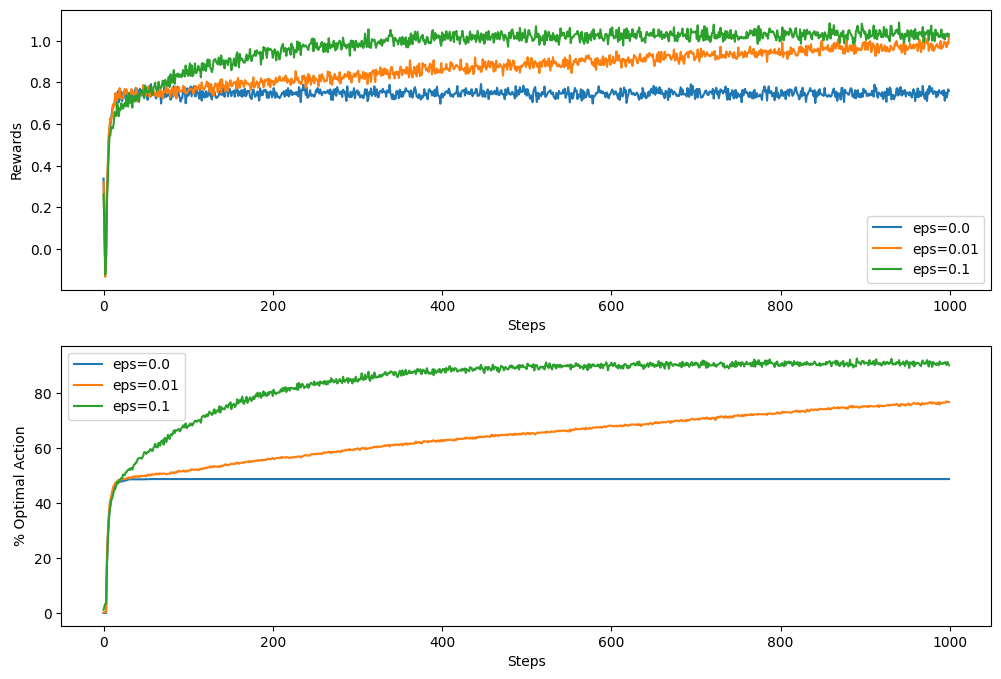

In [84]:
N_RUNS = 2000
N_STEPS = 1000

fig, axs = plt.subplots(2, 1, figsize=(12, 8))
ax = axs.flatten()
for eps in [0., 0.01, 0.1]:
    print(f"EPS = {eps}")
    avg_r, avg_o = simulate_experiment(N_RUNS, N_STEPS, bandits, eps)
    [b.reset() for b in bandits]
    ax[0].plot(avg_r, label=f"eps={eps}")
    ax[1].plot(avg_o * 100, label=f"eps={eps}")

ax[0].set_xlabel("Steps")
ax[1].set_xlabel("Steps")
ax[0].set_ylabel("Rewards")
ax[1].set_ylabel("% Optimal Action")
ax[0].legend()
ax[1].legend()
# fig.tight_layout()
plt.show()

    
    